# Example: Plane Change Maneuver

Find the $\Delta v$ requirement for an orbital transfer from a 300 km circular LEO at 28.6° inclination to geostationary equatorial orbit. Assume a Hohmann transfer. Compare the $\Delta v$ requirement for 2 cases:

1. The Hohmann trajectory has an inclination of 28.6° (plane change at altitude)
2. The Hohmann trajectory has an inclination of 0° (plane change at LEO)

Also compare to the case where the satellite starts in an equatorial orbit (no plane change required).

## Solution

From our analysis of the plane change $\Delta v$ equations, we expect that plane changes at altitude will be more efficient than in LEO because the speed decreases for higher altitude orbits. Likewise, we expect that the maneuvers that require a plane change will require more $\Delta v$ than the one that doesn't.

To start, we need to define the various radii, angular momenta, and speeds of the initial and final orbits.

In [1]:
import numpy as np

In [2]:
R_E = 6378  # km
mu = 3.986E5  # km**3/s**2
delta_i = np.radians(28.6)

r_1 = 300 + R_E  # km
v_1 = np.sqrt(mu / r_1)  # km/s
h_1 = r_1 * v_1  # km**2/s

r_2 = 42_164  # km
v_2 = np.sqrt(mu / r_2)  # km/s
h_2 = r_2 * v_2  # km**2/s

Then, we can calculate the properties of the Hohmann transfer orbit. Interestingly, the angular momentum is independent of the inclination, since it depends only on the apogee and perigee radii:

$$h_t = \sqrt{2\mu}\sqrt{\frac{r_1 r_2}{r_1 + r_2}}$$

In [3]:
h_t = np.sqrt(2 * mu * (r_1 * r_2) / (r_1 + r_2))
v_t1 = h_t / r_1
v_t2 = h_t / r_2

For the case of the plane change at altitude (Case 1), the total $\Delta v$ is the speed increase to transfer onto the Hohmann $v_{t1} - v_1$ plus the speed change to get onto the GEO, plus the plane change at GEO, where the last two steps occur in one maneuver. Thus, the equation is:

$$\Delta v = v_{t1} - v_1 + \sqrt{v_2^2 + v_{t2}^2 - 2 v_2 v_{t2}\cos\Delta i}$$

where $\Delta i$ = 28.6°.

In [4]:
Delta_v = v_t1 - v_1 + np.sqrt(v_2**2 + v_t2**2 - 2 * v_2 * v_t2 * np.cos(delta_i))
print(f"{Delta_v=:.4F} km/s")

Delta_v=4.2583 km/s


For the case of the plane change in LEO (Case 2), the plane change is added to the first velocity increment:

$$\Delta v = \sqrt{v_1^2 + v_{t1}^2 - 2 v_1 v_{t1}\cos\Delta i} + v_2 - v_{t2}$$

In [5]:
Delta_v = np.sqrt(v_1**2 + v_t1**2 - 2 * v_1 * v_t1 * np.cos(delta_i)) + v_2 - v_t2
print(f"{Delta_v=:.4F} km/s")

Delta_v=6.4692 km/s


As expected, doing the plane change in LEO required a larger $\Delta v$, because the speed of the spacecraft is higher in LEO than GEO. Comparing to the case with no plane change:

In [6]:
Delta_v = v_t1 - v_1 + v_2 - v_t2
print(f"{Delta_v=:.4F} km/s")

Delta_v=3.8926 km/s


We can see that the plane change adds 0.37 km/s of $\Delta v$ requirement.

Interestingly, splitting the plane change so part happens on departure from LEO and part happens on arrival at GEO turns out to be more efficient than doing the entire plane change at GEO. If we assume that some plane change $\Delta i$ happens on departure from LEO into the Hohmann transfer, and the remainder ($28.6° - \Delta i$) happens on arrival to GEO, then we can write the total $\Delta v$ for the maneuvers:

$$\Delta v_{\text{total}} = \sqrt{v_1^2 + v_{t1}^2 - 2 v_1 v_{t1}\cos\Delta i} + \sqrt{v_2^2 + v_{t2}^2 - 2 v_2 v_{t2}\cos\left(28.6° - \Delta i\right)}$$

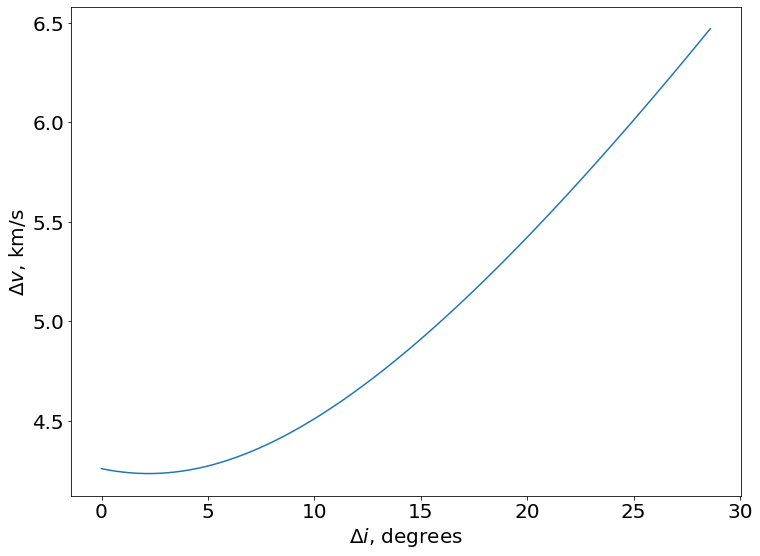

In [7]:
import matplotlib.pyplot as plt
plt.rc("font", size=20)
total_inclination_change = np.radians(28.6)
delta_i = np.linspace(0, total_inclination_change, 1000)
delta_v_total = np.sqrt(v_1**2 + v_t1**2 - 2 * v_1 * v_t1 * np.cos(delta_i)) + np.sqrt(v_2**2 + v_t2**2 - 2 * v_2 * v_t2 * np.cos(delta_i[-1] - delta_i))
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(np.degrees(delta_i), delta_v_total)
ax.set_xlabel(r"$\Delta i$, degrees")
ax.set_ylabel(r"$\Delta v$, km/s");

In this graph, $\Delta i$ = 0° shows Case 1 (plane change at altitude) and the right side of the graph shows Case 2 (plane change in LEO). We can see that there appears to be a minimum in the $\Delta v$ around $\Delta i$ = 2.5°. This means that about 2.5° of plane change should happen when transferring into the Hohmann trajectory, and the remainder should happen at altitude. We can determine the value of this optimium by taking the derivative with respect to $\Delta i$ and setting it equal to zero:

$$\frac{d\Delta v}{d\Delta i} = \frac{v_1 v_{t1}\sin\Delta i}{\sqrt{v_1^2 + v_{t1}^2 - 2v_1v_{t1}\cos\Delta i}} - \frac{v_2 v_{t2}\sin\left(28.6° - \Delta i\right)}{\sqrt{v_2^2 + v_{t2}^2 - 2v_2v_{t2}\cos\left(28.6° - \Delta i\right)}} = 0$$

This equation must be solved numerically, but we can plot it to verify the behavior:

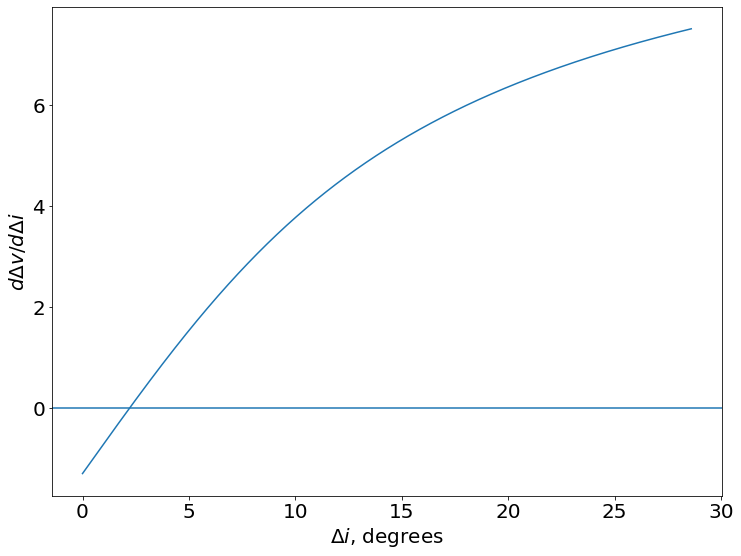

In [8]:
d_v_d_i = v_1*v_t1*np.sin(delta_i) / (np.sqrt(v_1**2 + v_t1**2 - 2*v_1*v_t1*np.cos(delta_i)))
d_v_d_i -= v_2 * v_t2 * np.sin(delta_i[-1] - delta_i) / (np.sqrt(v_2**2 + v_t2**2 - 2*v_2*v_t2*np.cos(delta_i[-1] - delta_i)))
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(np.degrees(delta_i), d_v_d_i)
ax.axhline(0)
ax.set_xlabel(r"$\Delta i$, degrees")
ax.set_ylabel(r"$d\Delta v/d \Delta i$");

As expected, there is a single zero crossing of this function. We can use the Newton solver to find the optimum value.

In [9]:
from scipy.optimize import newton
def func(delta_i, v_1, v_t1, v_2, v_t2):
    d_v_d_i = v_1*v_t1*np.sin(delta_i) / (np.sqrt(v_1**2 + v_t1**2 - 2*v_1*v_t1*np.cos(delta_i)))
    d_v_d_i -= v_2 * v_t2 * np.sin(total_inclination_change - delta_i) / (np.sqrt(v_2**2 + v_t2**2 - 2*v_2*v_t2*np.cos(total_inclination_change - delta_i)))
    return d_v_d_i

delta_i_opt = newton(func, x0=np.radians(2.5), args=(v_1, v_t1, v_2, v_t2))
print(f"{np.degrees(delta_i_opt)=:.4F}°")

np.degrees(delta_i_opt)=2.2051°


In [10]:
delta_v_opt = np.sqrt(v_1**2 + v_t1**2 - 2 * v_1 * v_t1 * np.cos(delta_i_opt)) + np.sqrt(v_2**2 + v_t2**2 - 2 * v_2 * v_t2 * np.cos(total_inclination_change - delta_i_opt))
print(f"{delta_v_opt=:.4F} km/s")

delta_v_opt=4.2335 km/s


The result with the entire plane change at altitude was 4.2583 km/s, so the optimized value is less than 1% different from the value we calculated previously.